In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.losses as losses
import tensorflow.keras.callbacks as callbacks
%matplotlib inline

In [2]:
tf.config.experimental.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
DATASET_PATH = "/content/drive/MyDrive/kaggle_bee_vs_wasp/kaggle_bee_vs_wasp"

label_csv = os.path.join(DATASET_PATH, 'labels.csv')

In [4]:
label_df = pd.read_csv(label_csv)
label_df.head(35)

,id,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
0,1,bee1\10007154554_026417cfd0_n.jpg,1,0,0,0,1,0,0,bee
1,2,bee1\10024864894_6dc54d4b34_n.jpg,1,0,0,0,1,0,1,bee
2,3,bee1\10092043833_7306dfd1f0_n.jpg,1,0,0,0,1,1,0,bee
3,4,bee1\1011948979_fc3637e779_w.jpg,1,0,0,0,1,0,1,bee
4,5,bee1\10128235063_dca17db76c_n.jpg,1,0,0,0,1,0,0,bee
5,6,bee1\10130729734_f68738333e_w.jpg,1,0,0,0,1,0,0,bee
6,7,bee1\10166485783_9cd6706c72_n.jpg,1,0,0,0,1,0,0,bee
7,8,bee1\10179824_84803290ac_m.jpg,1,0,0,0,1,0,0,bee
8,9,bee1\10197482094_0176d1bacb_n.jpg,1,0,0,0,1,0,0,bee
9,10,bee1\10242298546_aac12f5223_n.jpg,1,0,0,0,1,0,0,bee


In [5]:
def dataset_distribution(row):
  if row['is_validation'] == 0 and row['is_final_validation'] == 0:
    return 'train'
  elif row['is_validation'] == 1:
    return 'validation'
  else:
    return 'test'
  
label_df['type'] = label_df.apply(dataset_distribution, axis = 1)
print('Number of images in each set:')
label_df['type'].value_counts()


Number of images in each set:


train         7939
test          1763
validation    1719
Name: type, dtype: int64

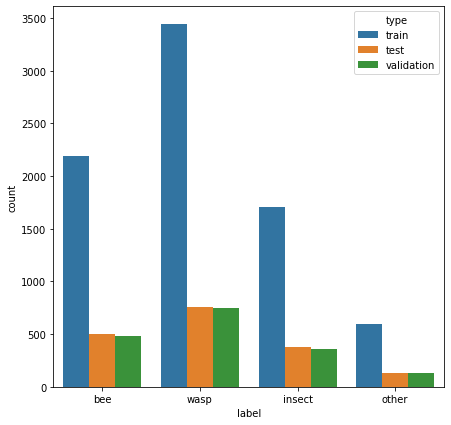

In [6]:
plt.figure(figsize = (7,7))
sb.countplot(x = 'label', hue='type', data= label_df)
plt.show()

In [7]:
label_df['path'] = label_df['path'].str.replace('\\', os.sep)
label_df['path'].head()

0    bee1/10007154554_026417cfd0_n.jpg
1    bee1/10024864894_6dc54d4b34_n.jpg
2    bee1/10092043833_7306dfd1f0_n.jpg
3     bee1/1011948979_fc3637e779_w.jpg
4    bee1/10128235063_dca17db76c_n.jpg
Name: path, dtype: object

In [8]:
train_df = label_df[label_df['type'] == 'train']
validation_df = label_df[label_df['type'] == 'validation']
test_df = label_df[label_df['type'] == 'test']

In [9]:
image_size = (224,224)
BATCH_SIZE = 32
EPOCHS = 15
SEED = 42

In [10]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

train_set = datagen.flow_from_dataframe(train_df, 
                                            directory=DATASET_PATH, 
                                            x_col="path", 
                                            y_col="label",
                                            target_size=image_size,
                                            seed = 42
                                        
                                           )


validation_set = datagen.flow_from_dataframe(validation_df, 
                                            directory=DATASET_PATH, 
                                            x_col="path", 
                                            y_col="label",
                                            target_size=image_size,
                                            seed = 42
                                           )

test_set = datagen.flow_from_dataframe(test_df, 
                                      directory=DATASET_PATH, 
                                      x_col="path", 
                                      y_col="label",
                                      target_size=image_size,
                                      seed = 42
                                      )

Found 7939 validated image filenames belonging to 4 classes.
Found 1719 validated image filenames belonging to 4 classes.
Found 1763 validated image filenames belonging to 4 classes.


In [11]:
number_of_classes = len(label_df['label'].unique())
print("number_of_classes : ",number_of_classes)

number_of_classes :  4


In [12]:
vgg19 = keras.applications.VGG19(include_top=False,weights="imagenet", input_shape=(224,224, 3),classifier_activation="softmax")

In [13]:
from tensorflow.keras.initializers import RandomNormal, Constant

model = models.Sequential([
    vgg19,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(number_of_classes,activation="softmax")
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss=losses.BinaryCrossentropy(),
              metrics=['accuracy']
             )

history = model.fit(train_set, 
          validation_data=validation_set, 
          batch_size=32,
          epochs=50,
         )

Epoch 1/50
249/249 [==============================] - 137s 527ms/step - loss: 0.3925 - accuracy: 0.6282 - val_loss: 0.2152 - val_accuracy: 0.8016
Epoch 2/50
249/249 [==============================] - 128s 513ms/step - loss: 0.1726 - accuracy: 0.8641 - val_loss: 0.2180 - val_accuracy: 0.8307
Epoch 3/50
249/249 [==============================] - 128s 513ms/step - loss: 0.1303 - accuracy: 0.9008 - val_loss: 0.1229 - val_accuracy: 0.9151
Epoch 4/50
249/249 [==============================] - 128s 513ms/step - loss: 0.1039 - accuracy: 0.9266 - val_loss: 0.1213 - val_accuracy: 0.9122
Epoch 5/50
249/249 [==============================] - 128s 512ms/step - loss: 0.0802 - accuracy: 0.9453 - val_loss: 0.1055 - val_accuracy: 0.9296
Epoch 6/50
249/249 [==============================] - 128s 513ms/step - loss: 0.0580 - accuracy: 0.9586 - val_loss: 0.1185 - val_accuracy: 0.9215
Epoch 7/50
249/249 [==============================] - 128s 512ms/step - loss: 0.0588 - accuracy: 0.9576 - val_loss: 0.1233 -

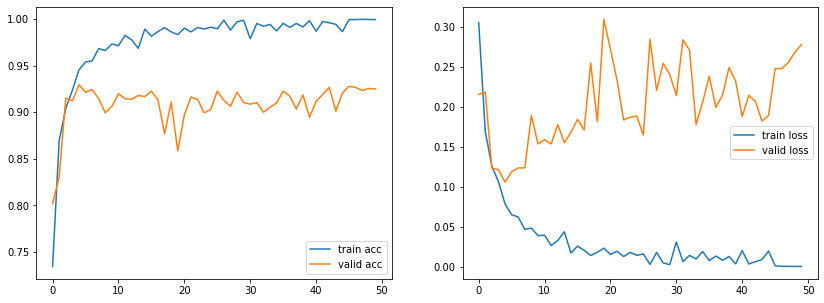

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='train acc')
plt.plot(val_acc, label='valid acc')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='train loss')
plt.plot(val_loss, label='valid loss')
plt.legend()

plt.show()

In [15]:
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print("Test accuracy:", test_acc)

56/56 - 9s - loss: 0.2420 - accuracy: 0.9285
Test accuracy: 0.9285309314727783
